In [5]:
from PIL import Image,ImageDraw,ImageFont

In [6]:
# create Image object
text1 = 'Create Feature Image'
text2 = 'With Python'
img_name = 'generated.png'
color = 'dark_blue' #grey,light_blue,blue,orange,purple,yellow,green
font = 'Roboto-Bold.ttf'
 
background = Image.open('desert.jpg')
foreground = Image.open('frame.png')
 
#create the coloured overlays
colors = {
    'dark_blue':{'c':(27,53,81),'p_font':'rgb(255,255,255)','s_font':'rgb(255, 212, 55)'},
    'grey':{'c':(70,86,95),'p_font':'rgb(255,255,255)','s_font':'rgb(93,188,210)'},
    'light_blue':{'c':(93,188,210),'p_font':'rgb(27,53,81)','s_font':'rgb(255,255,255)'},
    'blue':{'c':(23,114,237),'p_font':'rgb(255,255,255)','s_font':'rgb(255, 255, 255)'},
    'orange':{'c':(242,174,100),'p_font':'rgb(0,0,0)','s_font':'rgb(0,0,0)'},
    'purple':{'c':(114,88,136),'p_font':'rgb(255,255,255)','s_font':'rgb(255, 212, 55)'},
    'red':{'c':(255,0,0),'p_font':'rgb(0,0,0)','s_font':'rgb(0,0,0)'},
    'yellow':{'c':(255,255,0),'p_font':'rgb(0,0,0)','s_font':'rgb(27,53,81)'},
    'yellow_green':{'c':(232,240,165),'p_font':'rgb(0,0,0)','s_font':'rgb(0,0,0)'},
    'green':{'c':(65, 162, 77),'p_font':'rgb(217, 210, 192)','s_font':'rgb(0, 0, 0)'}
    }
 
def add_color(image,c,transparency):
    color = Image.new('RGB',image.size,c)
    mask = Image.new('RGBA',image.size,(0,0,0,transparency))
    return Image.composite(image,color,mask).convert('RGB')
 
def center_text(img,font,text1,text2,fill1,fill2):
    draw = ImageDraw.Draw(img)
    w,h = img.size
    t1_width, t1_height = draw.textsize(text1, font)
    t2_width, t2_height = draw.textsize(text2, font)
    p1 = ((w-t1_width)/2,h // 3)
    p2 = ((w-t2_width)/2,h // 3 + h // 5)
    draw.text(p1, text1, fill=fill1, font=font)
    draw.text(p2, text2, fill=fill2, font=font)
    return img
 
def add_text(img,color,text1,text2,logo=False,font='Roboto-Bold.ttf',font_size=75):
    draw = ImageDraw.Draw(img)
 
    p_font = color['p_font']
    s_font = color['s_font']
     
    # starting position of the message
    img_w, img_h = img.size
    height = img_h // 3
    font = ImageFont.truetype(font,size=font_size)
 
    if logo == False:
        center_text(img,font,text1,text2,p_font,s_font)
    else:
        text1_offset = (img_w // 4, height)
        text2_offset = (img_w // 4, height + img_h // 5)
        draw.text(text1_offset, text1, fill=p_font, font=font)
        draw.text(text2_offset, text2, fill=s_font, font=font)
    return img
 
def add_logo(background,foreground):
    bg_w, bg_h = background.size
    img_w, img_h = foreground.size
    img_offset = (20, (bg_h - img_h) // 2)
    background.paste(foreground, img_offset, foreground)
    return background
 
def write_image(background,color,text1,text2,foreground=''):
    background = add_color(background,color['c'],25)
    if not foreground:
        add_text(background,color,text1,text2)
    else:
        add_text(background,color,text1,text2,logo=True)
        add_logo(background,foreground)
    return background
    

In [7]:
background = write_image(background,colors[color],text1,text2,foreground=foreground)
background.save(img_name) 

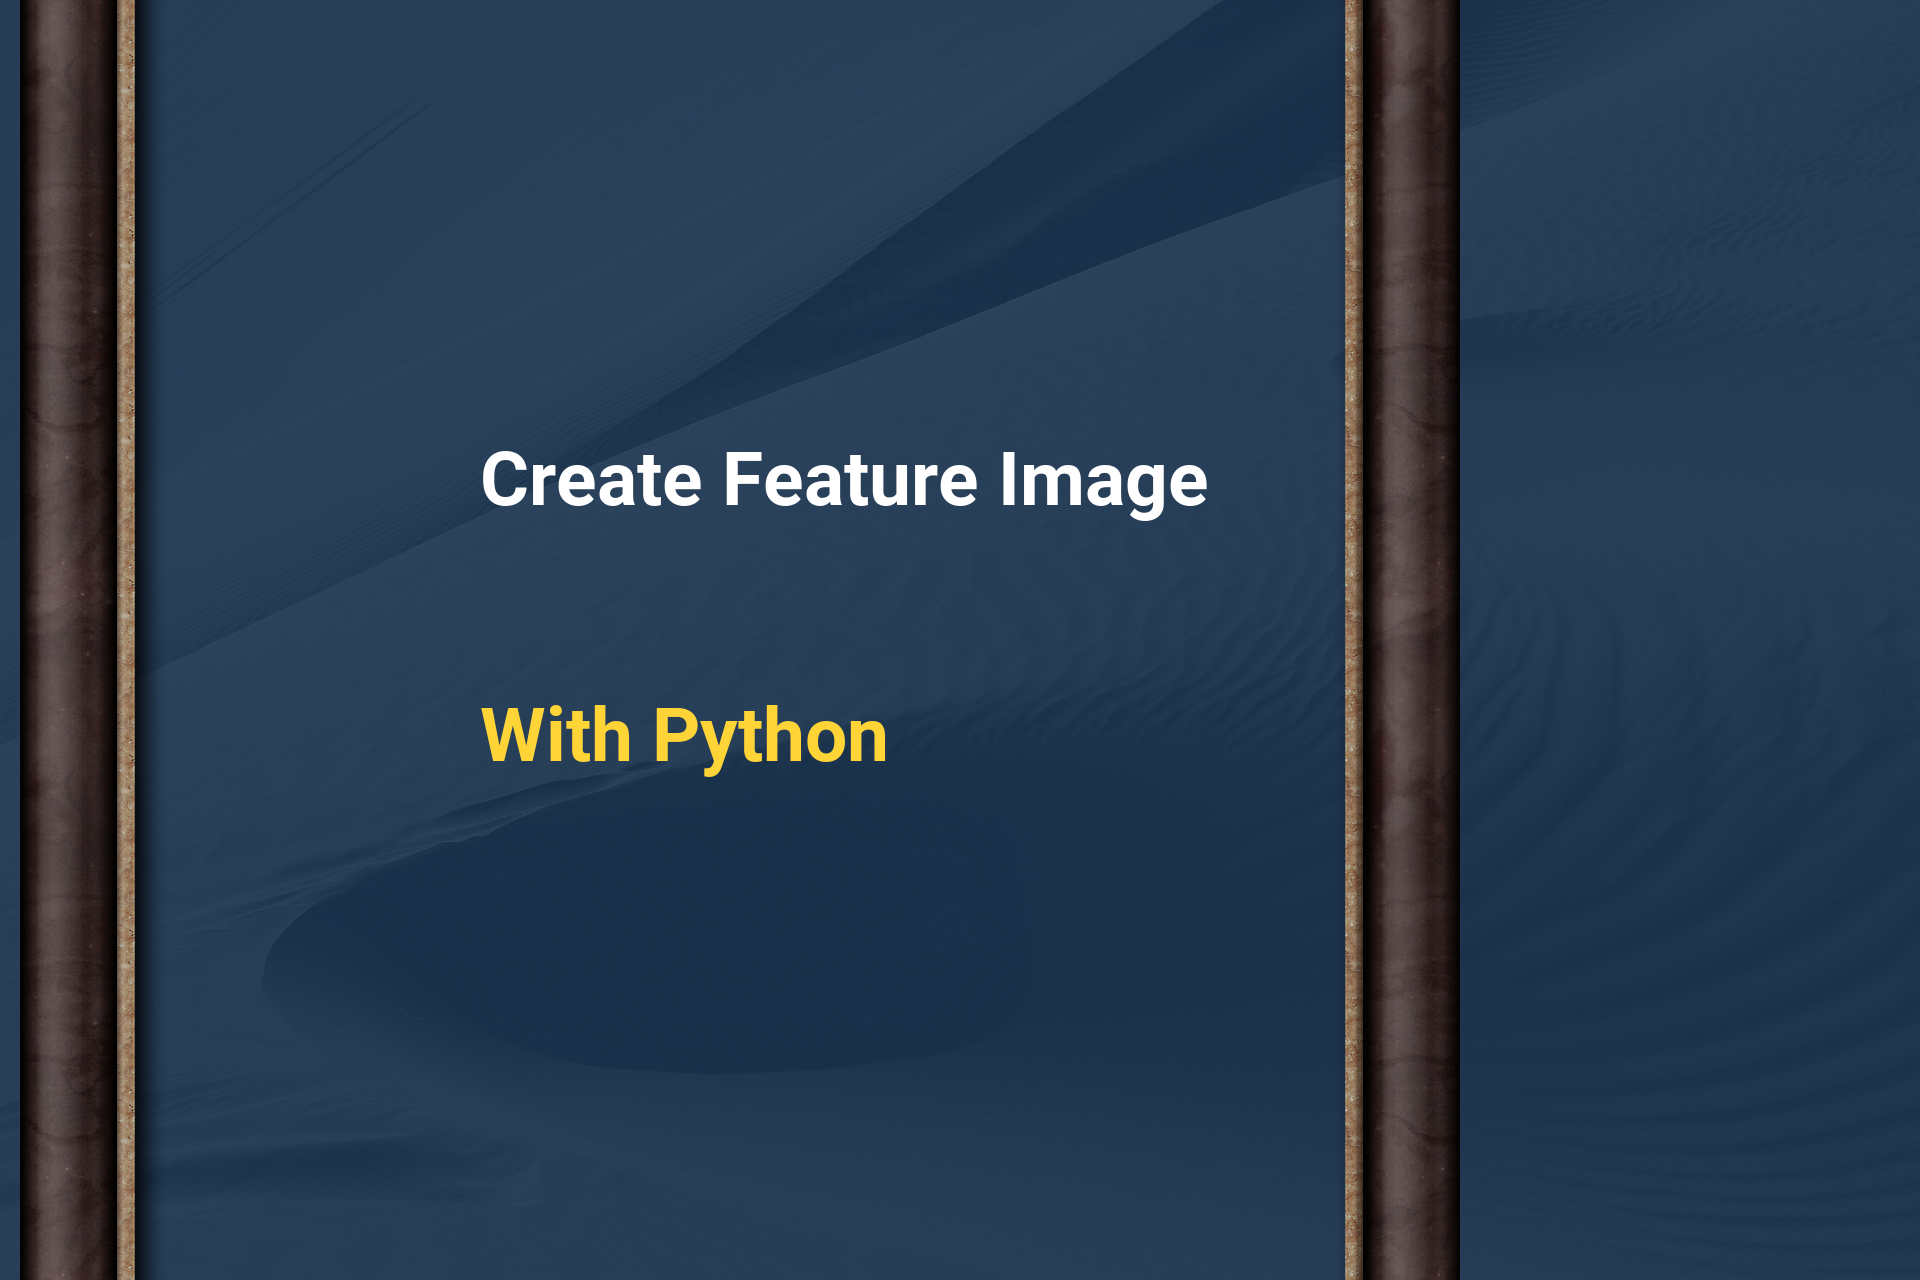

In [8]:
background